# EDA & Data Preprocessing on Google App Store Rating Dataset.

In [1]:
#  Import required libraries and read the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
import os
os.getcwd()

'C:\\Users\\krish'

In [17]:

df = pd.read_csv('Apps_data+(1).csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
# Check the first few samples, shape, info of the data and try to familiarize yourself with different features.
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8662,To-do list,PRODUCTIVITY,4.4,688,4.4M,"50,000+",Free,0,Everyone,Productivity,"July 17, 2018",2.22,4.0 and up
6519,BN Inscript Improved Input keyboard,PRODUCTIVITY,NaN,0,6.2M,10+,Free,0,Everyone,Productivity,"December 7, 2017",1.0,2.3 and up
9930,EU-Schwerbehinderung,NEWS_AND_MAGAZINES,NaN,3,32M,100+,Free,0,Everyone 10+,News & Magazines,"July 16, 2018",2.0.3.53,6.0 and up
2186,Bita and the Animals - Pelos Ares,FAMILY,4.4,1160,37M,"100,000+",Free,0,Everyone,Education;Music & Video,"May 22, 2013",1.0,2.2 and up
2411,Dialysis of Drugs,MEDICAL,2.9,92,1.5M,"10,000+",Free,0,Everyone,Medical,"June 15, 2018",3.1-2018 – (13),4.0 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
#  Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367,NaN,NaN,NaN,4.19334,0.537431,1,4,4.3,4.5,19
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Columns that need to be worked upon for model building are Category, 	Reviews, Size, 	Rating, Installs, Price, Content Rating, Type, Genres.

In [8]:
# Check if there are any duplicate records in the dataset? if any drop them.
df.duplicated().sum()

483

In [9]:
df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [10]:
df = df.drop_duplicates()

In [11]:
# Again checking for duplicates in data.
df.duplicated().sum()

0

In [12]:
# Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [18]:
df['Category'].sort_values()

10472               1.9
0        ART_AND_DESIGN
35       ART_AND_DESIGN
36       ART_AND_DESIGN
37       ART_AND_DESIGN
              ...      
3645            WEATHER
3646            WEATHER
3647            WEATHER
8291            WEATHER
8168            WEATHER
Name: Category, Length: 10841, dtype: object

In [19]:
df.drop([10472], axis = 0, inplace = True)

In [20]:
# Again checking for invalid values in Category column.
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [21]:
# Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

df['Rating'].isnull().sum()


1474

In [22]:
df.dropna(inplace = True)

In [23]:
# Again checking for null values.
df['Rating'].isnull().sum()

0

In [24]:
df['Rating_category'] = df['Rating'].apply(lambda x: 'high' if x>3.5 else 'low')
print(df['Rating_category'])

0        high
1        high
2        high
3        high
4        high
         ... 
10834    high
10836    high
10837    high
10839    high
10840    high
Name: Rating_category, Length: 9360, dtype: object


<Axes: xlabel='Rating_category', ylabel='count'>

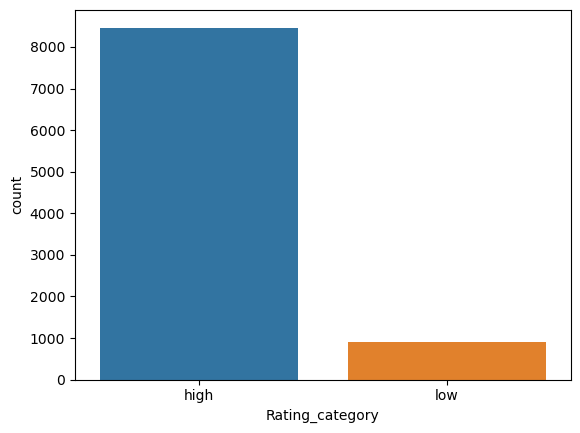

In [25]:
# Check the distribution of the newly created column 'Rating_category' and comment on the distribution.
sns.countplot(x = 'Rating_category', data = df)

# Observation  - As per the graph we can conclude that people likes the apps on playstore. There is a huge difference between high and low rating. Near about 8000 people have given high rating to apps to make them profitable and near about 1000 people have given low rating to apps.

In [26]:
# Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              9360 non-null   object 
 1   Category         9360 non-null   object 
 2   Rating           9360 non-null   float64
 3   Reviews          9360 non-null   object 
 4   Size             9360 non-null   object 
 5   Installs         9360 non-null   object 
 6   Type             9360 non-null   object 
 7   Price            9360 non-null   object 
 8   Content Rating   9360 non-null   object 
 9   Genres           9360 non-null   object 
 10  Last Updated     9360 non-null   object 
 11  Current Ver      9360 non-null   object 
 12  Android Ver      9360 non-null   object 
 13  Rating_category  9360 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.1+ MB


In [27]:
df['Reviews'].str.isdigit().sum()

9360

In [28]:
df['Reviews'] = df['Reviews'].astype('float')

In [29]:
# Again checking datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              9360 non-null   object 
 1   Category         9360 non-null   object 
 2   Rating           9360 non-null   float64
 3   Reviews          9360 non-null   float64
 4   Size             9360 non-null   object 
 5   Installs         9360 non-null   object 
 6   Type             9360 non-null   object 
 7   Price            9360 non-null   object 
 8   Content Rating   9360 non-null   object 
 9   Genres           9360 non-null   object 
 10  Last Updated     9360 non-null   object 
 11  Current Ver      9360 non-null   object 
 12  Android Ver      9360 non-null   object 
 13  Rating_category  9360 non-null   object 
dtypes: float64(2), object(12)
memory usage: 1.1+ MB


<Axes: >

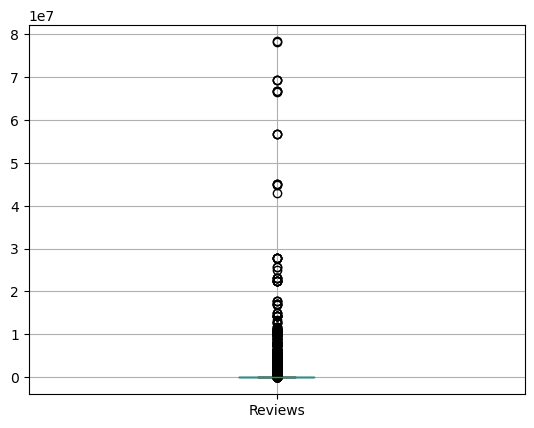

In [30]:
df.boxplot(column = ['Reviews'])

In [31]:
df['Reviews'] = np.log(df['Reviews'])

<Axes: >

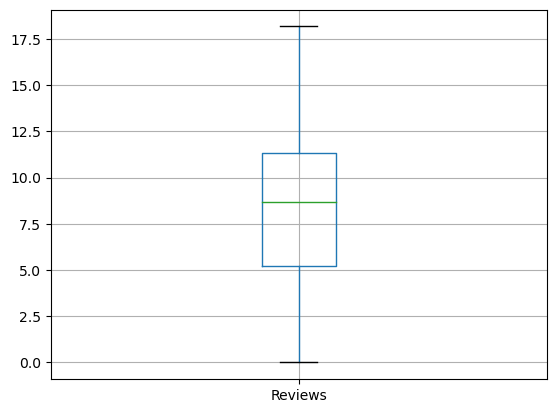

In [32]:
df.boxplot(column = ['Reviews'])

In [33]:
#  The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')
df.drop(df[df['Size'] == 'Varies with device'].index, inplace = True)
df.shape

(7723, 14)

In [34]:
df['Size'] = df['Size'].replace({'M':"*10**6", 'k':"*10**3"}, regex = True)


In [35]:
df['Size'] = df['Size'].map(eval)

In [36]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
6595,Blood Pressure Companion,MEDICAL,4.2,5.181784,4800000.0,"1,000+",Paid,$0.99,Everyone,Medical,"July 22, 2018",4.1.5 (Steglitz),4.1 and up,high
3308,ConvertPad - Unit Converter,TOOLS,4.4,11.416756,4300000.0,"10,000,000+",Free,0,Everyone,Tools,"June 18, 2017",3.1.00,4.2 and up,high
5899,Oxford A-Z of English Usage,BOOKS_AND_REFERENCE,4.0,8.575462,11000000.0,"1,000,000+",Free,0,Everyone,Books & Reference,"November 28, 2017",9.1.284,4.1 and up,high
4350,M-Files,BUSINESS,4.4,5.463832,44000000.0,"10,000+",Free,0,Everyone,Business,"June 26, 2018",3.1.1,4.4 and up,high
856,Complete Spanish Movies,ENTERTAINMENT,4.0,9.363576,4500000.0,"1,000,000+",Free,0,Everyone,Entertainment,"January 20, 2018",1.02,4.0.3 and up,high


In [37]:
# Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7723 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7723 non-null   object 
 1   Category         7723 non-null   object 
 2   Rating           7723 non-null   float64
 3   Reviews          7723 non-null   float64
 4   Size             7723 non-null   float64
 5   Installs         7723 non-null   object 
 6   Type             7723 non-null   object 
 7   Price            7723 non-null   object 
 8   Content Rating   7723 non-null   object 
 9   Genres           7723 non-null   object 
 10  Last Updated     7723 non-null   object 
 11  Current Ver      7723 non-null   object 
 12  Android Ver      7723 non-null   object 
 13  Rating_category  7723 non-null   object 
dtypes: float64(3), object(11)
memory usage: 905.0+ KB


In [38]:
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype('float')

In [39]:
# checking the datatype again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7723 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7723 non-null   object 
 1   Category         7723 non-null   object 
 2   Rating           7723 non-null   float64
 3   Reviews          7723 non-null   float64
 4   Size             7723 non-null   float64
 5   Installs         7723 non-null   float64
 6   Type             7723 non-null   object 
 7   Price            7723 non-null   object 
 8   Content Rating   7723 non-null   object 
 9   Genres           7723 non-null   object 
 10  Last Updated     7723 non-null   object 
 11  Current Ver      7723 non-null   object 
 12  Android Ver      7723 non-null   object 
 13  Rating_category  7723 non-null   object 
dtypes: float64(4), object(10)
memory usage: 905.0+ KB


In [40]:
# Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [41]:
df['Price'] = df['Price'].str.replace('$','').astype('float')

In [42]:
# checking the datatype again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7723 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7723 non-null   object 
 1   Category         7723 non-null   object 
 2   Rating           7723 non-null   float64
 3   Reviews          7723 non-null   float64
 4   Size             7723 non-null   float64
 5   Installs         7723 non-null   float64
 6   Type             7723 non-null   object 
 7   Price            7723 non-null   float64
 8   Content Rating   7723 non-null   object 
 9   Genres           7723 non-null   object 
 10  Last Updated     7723 non-null   object 
 11  Current Ver      7723 non-null   object 
 12  Android Ver      7723 non-null   object 
 13  Rating_category  7723 non-null   object 
dtypes: float64(5), object(9)
memory usage: 905.0+ KB


In [43]:
#  Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

df.drop(['Rating', 'App', 'Genres','Last Updated','Current Ver','Android Ver'], axis = 1)




,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000.0,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.874198,14000000.0,500000.0,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379508,8700000.0,5000000.0,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281384,25000000.0,50000000.0,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.874198,2800000.0,100000.0,Free,0.0,Everyone,high
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.784190,619000.0,1000.0,Free,0.0,Everyone,high
10834,FAMILY,1.945910,2600000.0,500.0,Free,0.0,Everyone,high
10836,FAMILY,3.637586,53000000.0,5000.0,Free,0.0,Everyone,high
10837,FAMILY,1.386294,3600000.0,100.0,Free,0.0,Everyone,high


In [44]:
df = df.drop(['Rating', 'App', 'Genres','Last Updated','Current Ver','Android Ver'], axis = 1)

In [45]:
# Again checking for columns in data.
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000.0,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.874198,14000000.0,500000.0,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379508,8700000.0,5000000.0,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281384,25000000.0,50000000.0,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.874198,2800000.0,100000.0,Free,0.0,Everyone,high


In [46]:
# Encode the categorical columns.
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [47]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Category']= label_encoder.fit_transform(df['Category'])
df['Category'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 15, 16, 17, 18,
       14, 11, 20, 27, 26, 24, 28, 30, 29, 23, 25, 22, 32, 31, 21, 19])

In [48]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.068904,19000000.0,10000.0,Free,0.0,Everyone,high
1,0,6.874198,14000000.0,500000.0,Free,0.0,Everyone,high
2,0,11.379508,8700000.0,5000000.0,Free,0.0,Everyone,high
3,0,12.281384,25000000.0,50000000.0,Free,0.0,Teen,high
4,0,6.874198,2800000.0,100000.0,Free,0.0,Everyone,high


In [49]:
# Segregate the target and independent features (Hint: Use Rating_category as the target)
x = df[['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']]
y = df[['Rating_category']]

In [50]:
x

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,5.068904,19000000.0,10000.0,Free,0.0,Everyone
1,0,6.874198,14000000.0,500000.0,Free,0.0,Everyone
2,0,11.379508,8700000.0,5000000.0,Free,0.0,Everyone
3,0,12.281384,25000000.0,50000000.0,Free,0.0,Teen
4,0,6.874198,2800000.0,100000.0,Free,0.0,Everyone
...,...,...,...,...,...,...,...
10833,3,3.784190,619000.0,1000.0,Free,0.0,Everyone
10834,11,1.945910,2600000.0,500.0,Free,0.0,Everyone
10836,11,3.637586,53000000.0,5000.0,Free,0.0,Everyone
10837,11,1.386294,3600000.0,100.0,Free,0.0,Everyone


In [51]:
y

,Rating_category
0,high
1,high
2,high
3,high
4,high
...,...
10833,high
10834,high
10836,high
10837,high


In [52]:
# Split the dataset into train and test.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [53]:
x = df[['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']]
y = df[['Rating_category']]

In [54]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.05, random_state=0)


In [55]:
x_train


,Category,Reviews,Size,Installs,Type,Price,Content Rating
8535,31,10.984971,5400000.0,10000000.0,Free,0.00,Everyone
9225,29,6.450470,3800000.0,100000.0,Free,0.00,Everyone
3336,29,10.799147,14000000.0,1000000.0,Free,0.00,Everyone
9140,28,14.678965,37000000.0,50000000.0,Free,0.00,Teen
5915,25,3.091042,2400000.0,5000.0,Free,0.00,Everyone
...,...,...,...,...,...,...,...
6949,12,4.615121,6900000.0,10000.0,Free,0.00,Everyone
4640,18,6.082219,26000000.0,50000.0,Free,0.00,Everyone
2277,20,5.123964,25000000.0,10000.0,Paid,24.99,Everyone
3781,21,10.942421,14000000.0,1000000.0,Free,0.00,Teen


In [56]:
y_train

,Rating_category
8535,high
9225,high
3336,high
9140,high
5915,high
...,...
6949,high
4640,high
2277,high
3781,high


In [57]:
#  Standardize the data, so that the values are within a particular range.
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.068904,19000000.0,10000.0,Free,0.0,Everyone,high
1,0,6.874198,14000000.0,500000.0,Free,0.0,Everyone,high
2,0,11.379508,8700000.0,5000000.0,Free,0.0,Everyone,high
3,0,12.281384,25000000.0,50000000.0,Free,0.0,Teen,high
4,0,6.874198,2800000.0,100000.0,Free,0.0,Everyone,high


In [58]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Content Rating']= label_encoder.fit_transform(df['Content Rating'])
df['Content Rating'].unique()

array([1, 4, 2, 3, 0, 5])

In [59]:
df = pd.get_dummies(df, columns = ['Type'])

In [60]:
df = pd.get_dummies(df, columns = ['Rating_category'])

In [61]:
df.head()

,Category,Reviews,Size,Installs,Price,Content Rating,Type_Free,Type_Paid,Rating_category_high,Rating_category_low
0,0,5.068904,19000000.0,10000.0,0.0,1,True,False,True,False
1,0,6.874198,14000000.0,500000.0,0.0,1,True,False,True,False
2,0,11.379508,8700000.0,5000000.0,0.0,1,True,False,True,False
3,0,12.281384,25000000.0,50000000.0,0.0,4,True,False,True,False
4,0,6.874198,2800000.0,100000.0,0.0,1,True,False,True,False


In [62]:
df_ss = (df - df.mean()) / df.std()

In [63]:
df_ss

,Category,Reviews,Size,Installs,Price,Content Rating,Type_Free,Type_Paid,Rating_category_high,Rating_category_low
0,-2.036178,-0.701036,-0.169319,-0.167753,-0.064807,-0.468971,0.284137,-0.284137,0.349086,-0.349086
1,-2.036178,-0.218072,-0.382541,-0.157984,-0.064807,-0.468971,0.284137,-0.284137,0.349086,-0.349086
2,-2.036178,0.987219,-0.608558,-0.068266,-0.064807,-0.468971,0.284137,-0.284137,0.349086,-0.349086
3,-2.036178,1.228495,0.086549,0.828909,-0.064807,2.499767,0.284137,-0.284137,0.349086,-0.349086
4,-2.036178,-0.218072,-0.860161,-0.165959,-0.064807,-0.468971,0.284137,-0.284137,0.349086,-0.349086
...,...,...,...,...,...,...,...,...,...,...
10833,-1.667118,-1.044732,-0.953169,-0.167933,-0.064807,-0.468971,0.284137,-0.284137,0.349086,-0.349086
10834,-0.682958,-1.536521,-0.868690,-0.167943,-0.064807,-0.468971,0.284137,-0.284137,0.349086,-0.349086
10836,-0.682958,-1.083952,1.280598,-0.167853,-0.064807,-0.468971,0.284137,-0.284137,0.349086,-0.349086
10837,-0.682958,-1.686233,-0.826045,-0.167951,-0.064807,-0.468971,0.284137,-0.284137,0.349086,-0.349086
